In [5]:
import pandas as pd
import numpy as np

def get_state_dict():
    """Create a dictionary to convert between state names and codes."""
    return {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
        'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
        'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
        'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
        'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
        'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
        'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
        'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
        'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
        'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
    }

def calculate_kills_per_million():
    # Democratic majority data
    dem_majority_data = {
        2019: {
            'AL': 0, 'AK': 0, 'AZ': 0, 'AR': 0, 'CA': 1, 'CO': 1, 'CT': 1, 'DE': 1, 'FL': 0,
            'GA': 0, 'HI': 1, 'ID': 0, 'IL': 1, 'IN': 0, 'IA': 0, 'KS': 0, 'KY': 0, 'LA': 0,
            'ME': 1, 'MD': 1, 'MA': 1, 'MI': 0, 'MN': 0, 'MS': 0, 'MO': 0, 'MT': 0, 'NE': 0,
            'NV': 1, 'NH': 0, 'NJ': 1, 'NM': 1, 'NY': 1, 'NC': 0, 'ND': 0, 'OH': 0, 'OK': 0,
            'OR': 1, 'PA': 0, 'RI': 1, 'SC': 0, 'SD': 0, 'TN': 0, 'TX': 0, 'UT': 0, 'VT': 1,
            'VA': 0, 'WA': 1, 'WV': 0, 'WI': 0, 'WY': 0, 'DC': 1
        },
        2023: {
            'AL': 0, 'AK': 0, 'AZ': 0, 'AR': 0, 'CA': 1, 'CO': 1, 'CT': 1, 'DE': 1, 'FL': 0,
            'GA': 0, 'HI': 1, 'ID': 0, 'IL': 1, 'IN': 0, 'IA': 0, 'KS': 0, 'KY': 0, 'LA': 0,
            'ME': 1, 'MD': 1, 'MA': 1, 'MI': 1, 'MN': 1, 'MS': 0, 'MO': 0, 'MT': 0, 'NE': 0,
            'NV': 1, 'NH': 0, 'NJ': 1, 'NM': 1, 'NY': 1, 'NC': 0, 'ND': 0, 'OH': 0, 'OK': 0,
            'OR': 1, 'PA': 1, 'RI': 1, 'SC': 0, 'SD': 0, 'TN': 0, 'TX': 0, 'UT': 0, 'VT': 1,
            'VA': 0, 'WA': 1, 'WV': 0, 'WI': 1, 'WY': 0, 'DC': 1
        }
    }

    # Read the kills data
    kills_df = pd.read_csv('yearly_kills_by_state.csv')
    
    # Filter for years 2019 and 2023
    kills_df = kills_df[kills_df['year'].isin([2019, 2023])]
    
    # Read population data
    pop_2013_2019 = pd.read_csv('state_pop_2013_2019.csv', skiprows=3)
    pop_2020_2023 = pd.read_csv('state_pop_2020_2023.csv', skiprows=3)
    
    # Get state name to code mapping
    state_dict = get_state_dict()
    
    # Clean up population data
    non_states = ['United States', 'Northeast', 'Midwest', 'South', 'West', 'Puerto Rico', '']
    
    # Process 2019 data
    first_col = pop_2013_2019.columns[0]
    pop_2019 = pop_2013_2019[~pop_2013_2019[first_col].isin(non_states)].copy()
    pop_2019[first_col] = pop_2019[first_col].str.replace('.', '').str.strip()
    pop_2019 = pop_2019[[first_col, '2019']].copy()
    pop_2019.columns = ['state', 'population']
    pop_2019['year'] = 2019
    pop_2019['state'] = pop_2019['state'].map(state_dict)
    pop_2019['population'] = pop_2019['population'].str.replace(',', '').astype(float)
    
    # Process 2023 data
    first_col_2023 = pop_2020_2023.columns[0]
    pop_2023 = pop_2020_2023[~pop_2020_2023[first_col_2023].isin(non_states)].copy()
    pop_2023[first_col_2023] = pop_2023[first_col_2023].str.replace('.', '').str.strip()
    pop_2023 = pop_2023[[first_col_2023, '2023']].copy()
    pop_2023.columns = ['state', 'population']
    pop_2023['year'] = 2023
    pop_2023['state'] = pop_2023['state'].map(state_dict)
    pop_2023['population'] = pop_2023['population'].str.replace(',', '').astype(float)
    
    # Combine population data
    population_df = pd.concat([pop_2019, pop_2023], ignore_index=True)
    
    # Clean up kills data
    kills_df['state'] = kills_df['state'].str.replace('.', '')
    
    # Merge kills and population data
    merged_df = kills_df.merge(population_df, on=['state', 'year'], how='left')
    
    # Add democratic majority information
    merged_df['dem_majority'] = merged_df.apply(lambda row: dem_majority_data[row['year']][row['state']], axis=1)
    
    # Calculate kills per million
    merged_df['kills_per_million'] = (merged_df['total_kills'] * 1000000 / merged_df['population']).round(2)
    
    # Sort the data
    merged_df = merged_df.sort_values(['state', 'year'])
    
    return merged_df

# Execute the calculation
result_df = calculate_kills_per_million()

# Display summary statistics
print("\nFinal data shape:", result_df.shape)
print("\nSample of results (first 10 rows):")
print(result_df[['state', 'year', 'total_kills', 'population', 'kills_per_million', 'dem_majority']].head(10))

# Calculate averages by democratic majority for each year
dem_averages = result_df.groupby(['year', 'dem_majority'])['kills_per_million'].agg(['mean', 'count'])
print("\nAverages by Democratic majority status:")
print(dem_averages)

# Calculate changes from 2019 to 2023
print("\nChanges in kills per million from 2019 to 2023:")
changes_by_party = (result_df.pivot_table(
    index=['state', 'dem_majority'],
    columns='year',
    values='kills_per_million'
)
.assign(change=lambda x: x[2023] - x[2019])
.sort_values('change', ascending=False))

print("\nBiggest increases:")
print(changes_by_party.head(10))
print("\nBiggest decreases:")
print(changes_by_party.tail(10))

# Save to CSV
result_df.to_csv('police_violence_2019_2023_with_majority.csv', index=False)
print("\nData saved to 'police_violence_2019_2023_with_majority.csv'")


Final data shape: (100, 8)

Sample of results (first 10 rows):
  state  year  total_kills  population  kills_per_million  dem_majority
0    AK  2019            7    731545.0               9.57             0
1    AK  2023            7    733406.0               9.54             0
2    AL  2019           15   4903185.0               3.06             0
3    AL  2023           33   5108468.0               6.46             0
4    AR  2019           21   3017804.0               6.96             0
5    AR  2023           23   3067732.0               7.50             0
6    AZ  2019           37   7278717.0               5.08             0
7    AZ  2023           56   7431344.0               7.54             0
8    CA  2019          148  39512223.0               3.75             1
9    CA  2023          143  38965193.0               3.67             1

Averages by Democratic majority status:
                       mean  count
year dem_majority                 
2019 0             4.188125     3

In [7]:
result_df

,state,year,Bodycam_Policy,Imp_Year,total_kills,population,dem_majority,kills_per_million
0,AK,2019,0.0,NaN,7,731545.0,0,9.57
1,AK,2023,0.0,NaN,7,733406.0,0,9.54
2,AL,2019,0.0,NaN,15,4903185.0,0,3.06
3,AL,2023,0.0,NaN,33,5108468.0,0,6.46
4,AR,2019,0.0,NaN,21,3017804.0,0,6.96
...,...,...,...,...,...,...,...,...
95,WI,2023,0.0,NaN,23,5910955.0,1,3.89
96,WV,2019,0.0,NaN,13,1792147.0,0,7.25
97,WV,2023,0.0,NaN,15,1770071.0,0,8.47
98,WY,2019,0.0,NaN,2,578759.0,0,3.46


In [8]:

# Read the full dataset
df = pd.read_csv('police_violence_2019_2023_with_majority.csv')

# Drop specified columns
df = df.drop(columns=['Imp_Year', 'population', 'total_kills'])

# Save to new CSV
df.to_csv('cleaned.csv', index=False)
# Display first few rows
print("First few rows of cleaned dataset:")
print(df.head())

First few rows of cleaned dataset:
  state  year  Bodycam_Policy  dem_majority  kills_per_million
0    AK  2019             0.0             0               9.57
1    AK  2023             0.0             0               9.54
2    AL  2019             0.0             0               3.06
3    AL  2023             0.0             0               6.46
4    AR  2019             0.0             0               6.96


In [14]:
import pandas as pd

# Read the CSV data
df = pd.read_csv('cleaned.csv')

# Create new column initialized with zeros
df['bodycam'] = 0

# Set value to 1 for specified states in 2023
mask = (df['state'].isin(['CT', 'NJ', 'NM'])) & (df['year'] == 2023)
df.loc[mask, 'bodycam'] = 1

# Save the modified DataFrame
df.to_csv('dataset.csv', index=False)

Difference-in-Differences Analysis Results

Dependent Variable: Kills per Million

Key Coefficients:
DiD Estimator (Treatment Effect): 0.453
Standard Error: 0.737
P-value: 0.539

Body Camera Policy: -5.483
Post-2019 Effect: 0.510
Democratic Majority Effect: 0.258

Simple DiD Calculation (without controls):
Average Treatment Effect: 0.547

Means by Group and Time:
Treated Before (2019): 3.475
Treated After (2023): 4.438
Control Before (2019): 4.114
Control After (2023): 4.530


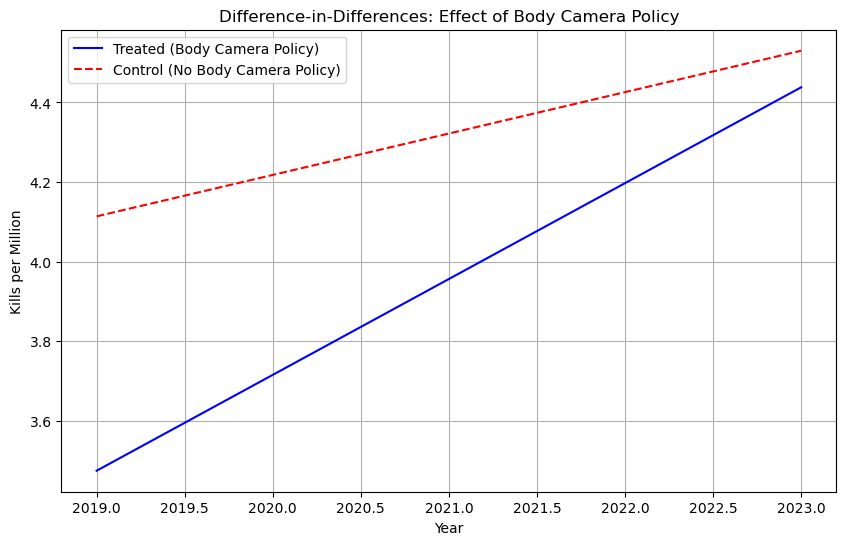

In [18]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load and clean the data
df = pd.read_csv('cleaned.csv')

# Fill missing values with 0 (or you might want to drop them using df.dropna())
df = df.fillna(0)

# Convert columns to numeric, forcing errors to become NaN
df['Bodycam_Policy'] = pd.to_numeric(df['Bodycam_Policy'], errors='coerce')
df['dem_majority'] = pd.to_numeric(df['dem_majority'], errors='coerce')
df['kills_per_million'] = pd.to_numeric(df['kills_per_million'], errors='coerce')

# Create interaction term between year and bodycam policy
df['post'] = (df['year'] == 2023).astype(int)
df['did'] = df['Bodycam_Policy'] * df['post']

# Create dummy variables for states to control for state fixed effects
state_dummies = pd.get_dummies(df['state'], prefix='state', drop_first=True)

# Prepare the data for regression
X = pd.concat([
    df[['Bodycam_Policy', 'post', 'did', 'dem_majority']],
    state_dummies
], axis=1)

# Add constant
X = sm.add_constant(X)

# Ensure all data is numeric
y = df['kills_per_million'].astype(float)
X = X.astype(float)

# Drop any rows with NaN values
mask = ~(np.isnan(y) | np.isnan(X).any(axis=1))
y = y[mask]
X = X[mask]

# Run regression
model = sm.OLS(y, X)
results = model.fit(cov_type='cluster', cov_kwds={'groups': df['state'][mask]})

# Print summary
print("Difference-in-Differences Analysis Results")
print("=========================================")
print("\nDependent Variable: Kills per Million")
print("\nKey Coefficients:")
print(f"DiD Estimator (Treatment Effect): {results.params['did']:.3f}")
print(f"Standard Error: {results.bse['did']:.3f}")
print(f"P-value: {results.pvalues['did']:.3f}")
print(f"\nBody Camera Policy: {results.params['Bodycam_Policy']:.3f}")
print(f"Post-2019 Effect: {results.params['post']:.3f}")
print(f"Democratic Majority Effect: {results.params['dem_majority']:.3f}")

# Calculate means for visualization
treated = df[df['Bodycam_Policy'] == 1]
control = df[df['Bodycam_Policy'] == 0]

treated_before = treated[treated['year'] == 2019]['kills_per_million'].mean()
treated_after = treated[treated['year'] == 2023]['kills_per_million'].mean()
control_before = control[control['year'] == 2019]['kills_per_million'].mean()
control_after = control[control['year'] == 2023]['kills_per_million'].mean()

did_estimate = (treated_after - treated_before) - (control_after - control_before)

print("\nSimple DiD Calculation (without controls):")
print(f"Average Treatment Effect: {did_estimate:.3f}")
print("\nMeans by Group and Time:")
print(f"Treated Before (2019): {treated_before:.3f}")
print(f"Treated After (2023): {treated_after:.3f}")
print(f"Control Before (2019): {control_before:.3f}")
print(f"Control After (2023): {control_after:.3f}")

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
years = [2019, 2023]

plt.plot(years, [treated_before, treated_after], 'b-', label='Treated (Body Camera Policy)')
plt.plot(years, [control_before, control_after], 'r--', label='Control (No Body Camera Policy)')

plt.xlabel('Year')
plt.ylabel('Kills per Million')
plt.title('Difference-in-Differences: Effect of Body Camera Policy')
plt.legend()
plt.grid(True)
plt.show()

Data Summary:
Number of states: 51
Number of treated states in 2023: 3

Mean kills per million by group and time:
Bodycam = 0, Year = 2019: 3.983
Bodycam = 0, Year = 2023: 4.460
Bodycam = 1, Year = 2019: nan
Bodycam = 1, Year = 2023: 5.333

Detailed Regression Results:
R-squared: 0.876

Key Coefficients:
DiD Estimator (Treatment Effect): 0.259
Standard Error: 0.398
P-value: 0.516
95% Confidence Interval: [-0.521, 1.038]


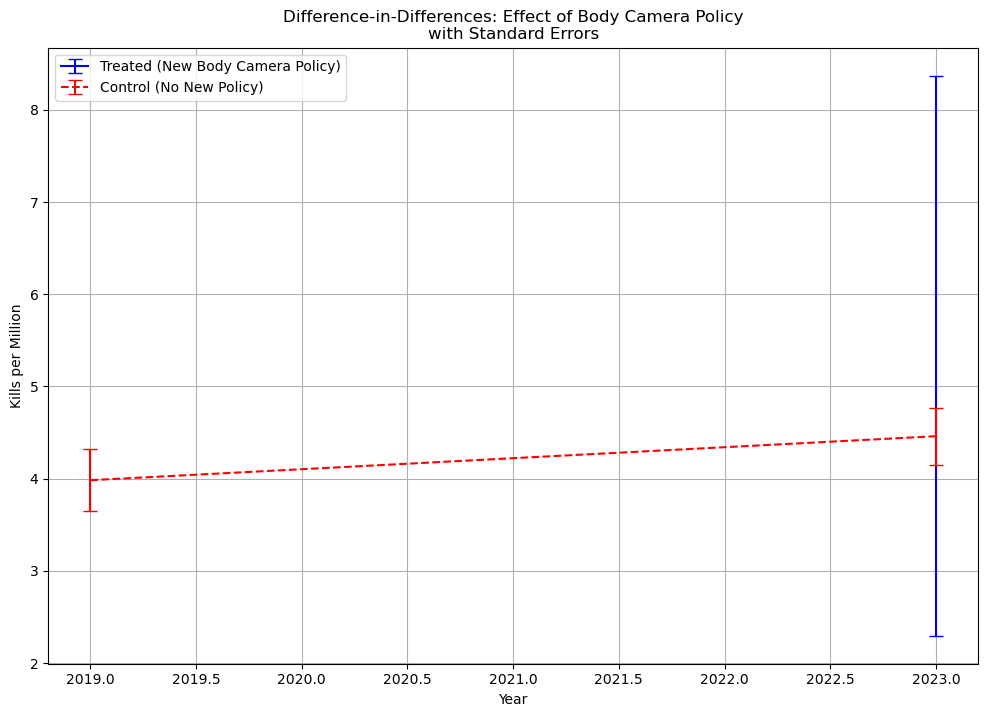

In [24]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Read data from Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1YWytXMYR24Kp8Eo542I401SyBj8Lra7Opd9BoZXOPhA/edit#gid=0"
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(url)

# Fill any missing values
df = df.fillna(0)

# Create post treatment indicator
df['post'] = (df['year'] == 2023).astype(int)

# Create interaction term for DiD
df['did'] = df['bodycam'] * df['post']

# Print summary statistics
print("Data Summary:")
print("=============")
print(f"Number of states: {df['state'].nunique()}")
print(f"Number of treated states in 2023: {df[df['bodycam'] == 1]['state'].nunique()}")
print("\nMean kills per million by group and time:")
for bodycam in [0, 1]:
    for year in [2019, 2023]:
        mean_kills = df[(df['bodycam'] == bodycam) & (df['year'] == year)]['kills_per_million'].mean()
        print(f"Bodycam = {bodycam}, Year = {year}: {mean_kills:.3f}")

# Create state fixed effects
state_dummies = pd.get_dummies(df['state'], prefix='state', drop_first=True)

# Prepare the data for regression
X = pd.concat([
    df[['bodycam', 'post', 'did', 'dem_majority']],
    state_dummies
], axis=1)

# Add constant
X = sm.add_constant(X)

# Ensure all data is numeric
y = df['kills_per_million'].astype(float)
X = X.astype(float)

# Run regression
model = sm.OLS(y, X)
results = model.fit(cov_type='cluster', cov_kwds={'groups': df['state']})

# Print detailed results
print("\nDetailed Regression Results:")
print("===========================")
print(f"R-squared: {results.rsquared:.3f}")
print("\nKey Coefficients:")
print(f"DiD Estimator (Treatment Effect): {results.params['did']:.3f}")
print(f"Standard Error: {results.bse['did']:.3f}")
print(f"P-value: {results.pvalues['did']:.3f}")
print(f"95% Confidence Interval: [{results.conf_int().loc['did'][0]:.3f}, {results.conf_int().loc['did'][1]:.3f}]")

# Visualization with error bars
plt.figure(figsize=(12, 8))
years = [2019, 2023]

# Calculate standard errors for means
def get_mean_and_se(data):
    mean = data['kills_per_million'].mean()
    se = data['kills_per_million'].std() / np.sqrt(len(data))
    return mean, se

# Get means and standard errors for each group and time
treated_means = []
treated_ses = []
control_means = []
control_ses = []

for year in years:
    # Treated group
    treated_data = df[(df['bodycam'] == 1) & (df['year'] == year)]
    mean, se = get_mean_and_se(treated_data)
    treated_means.append(mean)
    treated_ses.append(se)
    
    # Control group
    control_data = df[(df['bodycam'] == 0) & (df['year'] == year)]
    mean, se = get_mean_and_se(control_data)
    control_means.append(mean)
    control_ses.append(se)

plt.errorbar(years, treated_means, yerr=treated_ses, fmt='b-', label='Treated (New Body Camera Policy)', capsize=5)
plt.errorbar(years, control_means, yerr=control_ses, fmt='r--', label='Control (No New Policy)', capsize=5)

plt.xlabel('Year')
plt.ylabel('Kills per Million')
plt.title('Difference-in-Differences: Effect of Body Camera Policy\nwith Standard Errors')
plt.legend()
plt.grid(True)
plt.show()

Difference-in-Differences Analysis Results

Dependent Variable: Kills per Million

Key Coefficients:
DiD Estimator (Treatment Effect): 0.889
Standard Error: 0.822
P-value: 0.280

Body Camera Policy: -5.845
Post-2019 Effect: 0.393
Democratic Majority Effect: 0.374

Simple DiD Calculation (without controls):
Average Treatment Effect: 0.971

Means by Group and Time:
Treated Before (2019): 3.288
Treated After (2023): 4.570
Control Before (2019): 4.185
Control After (2023): 4.496


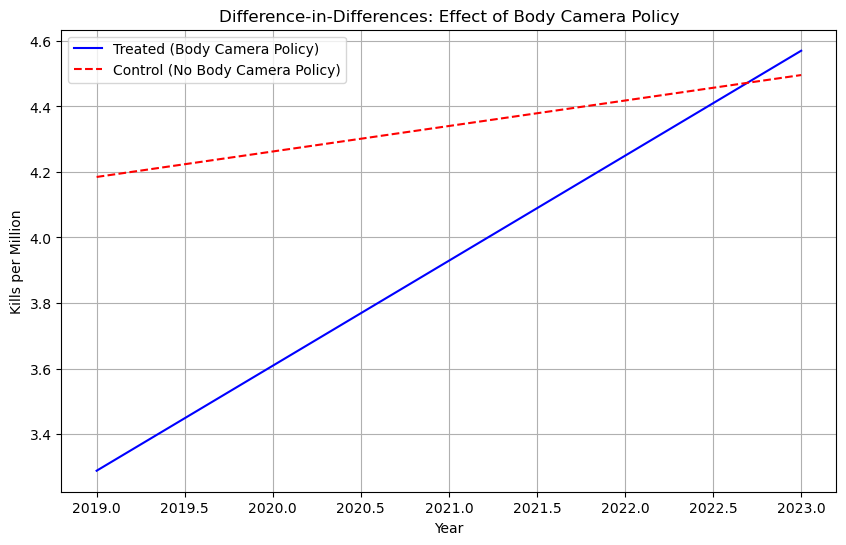

In [25]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Read data from Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1YWytXMYR24Kp8Eo542I401SyBj8Lra7Opd9BoZXOPhA/edit#gid=0"
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(url)

# Fill missing values with 0 (or you might want to drop them using df.dropna())
df = df.fillna(0)

# Convert columns to numeric, forcing errors to become NaN
df['Bodycam_Policy'] = pd.to_numeric(df['Bodycam_Policy'], errors='coerce')
df['dem_majority'] = pd.to_numeric(df['dem_majority'], errors='coerce')
df['kills_per_million'] = pd.to_numeric(df['kills_per_million'], errors='coerce')

# Create interaction term between year and bodycam policy
df['post'] = (df['year'] == 2023).astype(int)
df['did'] = df['Bodycam_Policy'] * df['post']

# Create dummy variables for states to control for state fixed effects
state_dummies = pd.get_dummies(df['state'], prefix='state', drop_first=True)

# Prepare the data for regression
X = pd.concat([
    df[['Bodycam_Policy', 'post', 'did', 'dem_majority']],
    state_dummies
], axis=1)

# Add constant
X = sm.add_constant(X)

# Ensure all data is numeric
y = df['kills_per_million'].astype(float)
X = X.astype(float)

# Drop any rows with NaN values
mask = ~(np.isnan(y) | np.isnan(X).any(axis=1))
y = y[mask]
X = X[mask]

# Run regression
model = sm.OLS(y, X)
results = model.fit(cov_type='cluster', cov_kwds={'groups': df['state'][mask]})

# Print summary
print("Difference-in-Differences Analysis Results")
print("=========================================")
print("\nDependent Variable: Kills per Million")
print("\nKey Coefficients:")
print(f"DiD Estimator (Treatment Effect): {results.params['did']:.3f}")
print(f"Standard Error: {results.bse['did']:.3f}")
print(f"P-value: {results.pvalues['did']:.3f}")
print(f"\nBody Camera Policy: {results.params['Bodycam_Policy']:.3f}")
print(f"Post-2019 Effect: {results.params['post']:.3f}")
print(f"Democratic Majority Effect: {results.params['dem_majority']:.3f}")

# Calculate means for visualization
treated = df[df['Bodycam_Policy'] == 1]
control = df[df['Bodycam_Policy'] == 0]

treated_before = treated[treated['year'] == 2019]['kills_per_million'].mean()
treated_after = treated[treated['year'] == 2023]['kills_per_million'].mean()
control_before = control[control['year'] == 2019]['kills_per_million'].mean()
control_after = control[control['year'] == 2023]['kills_per_million'].mean()

did_estimate = (treated_after - treated_before) - (control_after - control_before)

print("\nSimple DiD Calculation (without controls):")
print(f"Average Treatment Effect: {did_estimate:.3f}")
print("\nMeans by Group and Time:")
print(f"Treated Before (2019): {treated_before:.3f}")
print(f"Treated After (2023): {treated_after:.3f}")
print(f"Control Before (2019): {control_before:.3f}")
print(f"Control After (2023): {control_after:.3f}")

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
years = [2019, 2023]

plt.plot(years, [treated_before, treated_after], 'b-', label='Treated (Body Camera Policy)')
plt.plot(years, [control_before, control_after], 'r--', label='Control (No Body Camera Policy)')

plt.xlabel('Year')
plt.ylabel('Kills per Million')
plt.title('Difference-in-Differences: Effect of Body Camera Policy')
plt.legend()
plt.grid(True)
plt.show()